# Decision Boundary


You will :
* plot the decision boundary for regression model. This will give you the better sense of what the model is predicting.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

Let's suppose you have the following dataset
* Input **X** array with 6 training examples, each with 2 feartures
* Output **y** array with 6 examples, of either **0** or **1**

In [57]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### Plot data

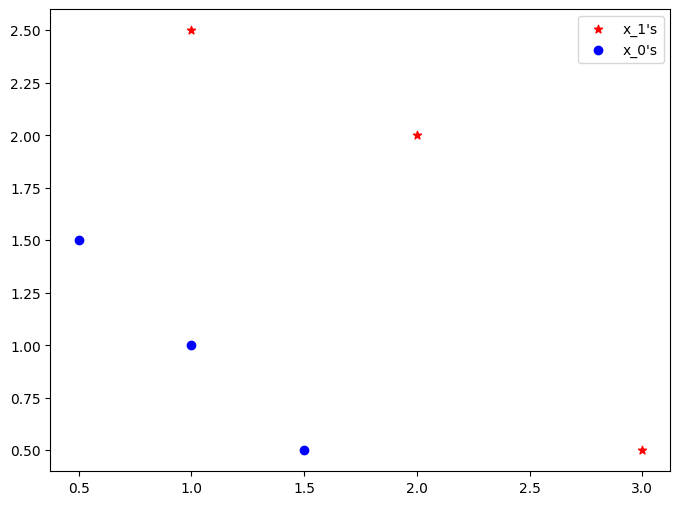

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(X[y.flatten()==1,0], X[y.flatten()==1,1], color='red', marker='*', label="x_1's")
plt.scatter(X[y.flatten()==0, 0], X[y.flatten()==0, 1], color='blue', marker='o', label="x_0's")
plt.legend()
plt.show()

### Logistic regression model

* Say you want to train your logistic regression model on this data:
  $$f_{w,b}(\mathbf{x^{(i)}}) = g(\mathbf{w\cdot x}^{(i)} + b)$$
  $$\mathbf{w\cdot x} = w_{0}\cdot x_{0} + w_{1}\cdot x_{1}$$
  $$f_{w,b}(\mathbf{x}) = g(w_{0}\cdot x_{0} + w_{1}\cdot x_{1} + b)$$

  where $g(\mathbf{z}) = \frac{1}{1+e^{-z}}$, which is the sigmoid function.

* Say you trained the model and get the parameters as  $b = -3, w_0 = 1, w_1 = 1$. which will be,

  $f_{w,b}(\mathbf{x}) = g(x_0+x_1-3)$

  given $\mathbf{x}$, $\mathbf{w}$ and $\mathbf{b}$ calculate $f_{w,b}(\mathbf{x})$ prediction
  * if $f_{w,b}(\mathbf{x}) \ge 05$, predict $y = 1$
  * if $f_{w,b}(\mathbf{x}) < 05$, predict $y = 0$  

* Let's plot a sigmoid graph to see where $g(z) \ge 0.5$

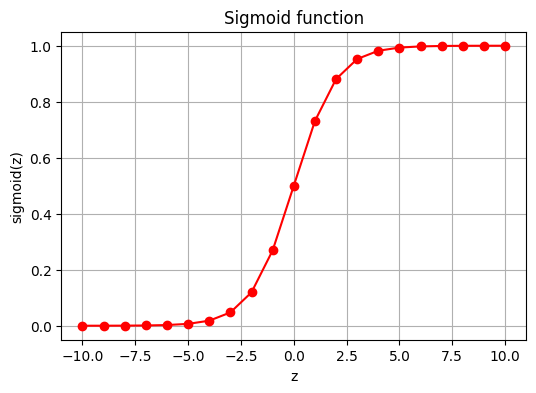

In [55]:
# plot sigmoid(z) over a range of values from -1 to 10
z=np.arange(-10,11)

def sigmod(z):
    return 1/(1 + np.exp(-z))

f_z=sigmod(z)

plt.figure(figsize=(6,4))
plt.plot(z, f_z, c="r",  marker='o')

plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

As we can see $g(z) \ge 0.5$ for $z \ge 0.5$

For a logistic regression model $z = \mathbf{w \cdot x} + b$, therefore
* if $\mathbf{w \cdot x} + b \ge 0$, the model predict $y=1$
* if $\mathbf{w \cdot x} + b < 0$, the model predict $y=0$ 

### Ploting decision boundary

Now, let's understand how logistic regression is making decisions.
* Our logistic regression model:
    $$f(\mathbf{x}) = g(-3 + x_{0} + x_{1})$$
    * from the above, we learned that the predict $y = 1$ if , $-3 + x_{0} + x_{1} \ge 0$

Let's see how to represent this graphically, let start by plotting $-3 + x_{0} + x_{1} = 0$, this is equivalent to $x_{1} = 3 - x_{0}$

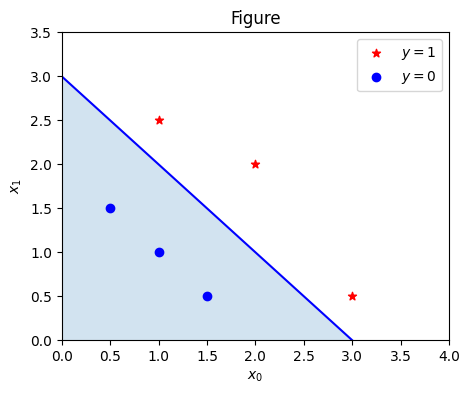

In [76]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

# choose values between 0 and 6
x0=np.arange(0,6)

x1 = 3 - x0
plt.figure(figsize=(5,4))

# plot the decision boundary
plt.plot(x0,x1, color='blue')
plt.axis([0,4,0,3.5])

# fill the region below the line
plt.fill_between(x0, x1, alpha=0.2)

# plot the original data
plt.scatter(X[y.flatten()==1,0], X[y.flatten()==1,1], color='red', marker='*', label=r'$y=1$')
plt.scatter(X[y.flatten()==0, 0], X[y.flatten()==0, 1], color='blue', marker='o', label='$y=0$')

plt.title('Figure')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.legend()
plt.show()

* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

* Note:
 
   * By using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.